# Female Technological Reskilling ¿Qué encontramos en la web?

Realizaremos una búsqueda en Google utilizando la palabra clave "female technological reskilling" y seleccionaremos las web mejor posicionadas, atendiendo a que tenga una solidad relación con el tema del proyecto. 

Seleccionamos tres artículos, el primero lo encontramos en la web del Boston Consulting Group, el segundo en el medio digital Metropolitan Barcelona, y por útlimo seleccionamos un artículo de la consultora McKinsey.

En primer lugar realizaremos un proceso de web scraping a fin de extraer los cuerpos de texto de cada una de ellas. A este cuerpo de texto le aplicaremos Procesamiento del Lenguaje Natural realizando un análisis de sentimientos para observar la polaridad.

Con los resultados obtenidos generaremos una visualización Nube de Palabras para ilustrar nuestro paper.

Finalizaremos con un análisis de polaridad de un texto producido por Chat GPT, a fin de ver sí la extracción de información que realiza esta Inteligencia Artificial se ve comprometida o polarizada. 

* WEB 1: https://www.bcg.com/publications/2020/how-reskilling-can-transform-future-work-women

* WEB 2: https://www.barcelona-metropolitan.com/features/women-are-writing-themselves-back-into-tech-history/

* WEB 3: https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/women-in-tech-the-best-bet-to-solve-europes-talent-shortage

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')
import requests

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Web 1

In [2]:
web_1 = "https://www.bcg.com/publications/2020/how-reskilling-can-transform-future-work-women"
r_1 = requests.get(web_1)
r_1.status_code

200

In [3]:
soup_1 = bs(r_1.content)

In [4]:
quote_elements_title_1 = soup_1.find_all("h1")
quote_elements_body_1 = soup_1.find_all("div", class_="rtf")

text_list_1 = [quote_elements_title_1[0].text]
  
for i in quote_elements_body_1:
    text_list_1.append(i.text)
    
full_text_1 = '\n'.join(text_list_1)
#print(full_text_1)

In [5]:
tokenized_text_1 = sent_tokenize(full_text_1)
#print(tokenized_text_1)

In [6]:
tokenized_word_1 = word_tokenize(full_text_1)
#print(tokenized_word_1)

In [7]:
freqdist_1 = FreqDist(tokenized_word_1)
print(freqdist_1)

<FreqDist with 590 samples and 1400 outcomes>


In [8]:
freqdist_1.most_common(15)

[('the', 63),
 ('of', 50),
 ('.', 45),
 (',', 45),
 ('and', 38),
 ('to', 35),
 ('in', 34),
 ('a', 28),
 ('that', 21),
 ('for', 18),
 ('women', 18),
 ('with', 16),
 ('digital', 13),
 ('can', 12),
 ('will', 11)]

Eliminamos las stopwords, aquellas palabras carentes de significado y procedemos a realizar la lematización de los textos. 

In [9]:
sw = set(stopwords.words("english"))
print("Stopwords de la librería: " ,sw)

Stopwords de la librería:  {'m', 'yourselves', 'its', 'was', 'all', "isn't", "doesn't", 'he', 'above', 'from', 'when', 'your', 'that', 'itself', 'them', 'before', 'his', 'for', 'by', 's', "you've", 'only', 'are', 'why', 'own', 'these', 'herself', 'this', 'after', 'some', 'can', 're', 'himself', 'but', 'll', 'such', 'few', "hasn't", 'been', 'did', 'up', 'a', 'needn', "won't", 'him', 'their', 'having', 'because', 'against', 'into', 'o', 'wasn', "she's", 'and', "wouldn't", "weren't", 'further', 'under', 'aren', 'at', 'if', 'of', 'you', 'down', 'those', 'our', 'couldn', 'theirs', 'not', 'wouldn', 'themselves', 'whom', 'out', 'hasn', 'over', 'isn', 'am', 'it', 'has', 'during', 'what', 'until', "haven't", 'mightn', 'her', 'my', 'any', "shan't", 'again', 'we', 'how', 'y', 'other', 'do', 'will', 'shouldn', 'the', 'doing', 'haven', 'doesn', 'to', 'about', 'there', 'she', 'with', "couldn't", "it's", 'below', 'ourselves', 'then', 'between', 'ours', 'be', "needn't", 'does', 'yours', 'an', "mustn't

In [10]:
sw_text_1=[]
for i in tokenized_word_1:
    if i not in sw:
        sw_text_1.append(i)
#print(sw_text_1)

In [11]:
ps_text_1 = PorterStemmer()

stemmed_words = []
for i in sw_text_1:
    stemmed_words.append(ps_text_1.stem(i))
#print(stemmed_words)

In [12]:
analisis_1 = SentimentIntensityAnalyzer()
analisis_1.polarity_scores(full_text_1)

{'neg': 0.033, 'neu': 0.817, 'pos': 0.151, 'compound': 0.9994}

# Web 2

In [13]:
web_2 = "https://www.barcelona-metropolitan.com/features/women-are-writing-themselves-back-into-tech-history/"
r_2 = requests.get(web_2)
r_2.status_code

200

In [14]:
soup_2 = bs(r_2.content)

In [15]:
quote_elements_title_2 = soup_2.find_all("h1")
quote_elements_body_2 = soup_2.find_all("p")

text_list_2 = [quote_elements_title_2[0].text]

    
for i in quote_elements_body_2:
    text_list_2.append(i.text)

full_text_2 = '\n'.join(text_list_2)
#print(full_text_2)

In [16]:
tokenized_text_2 = sent_tokenize(full_text_2)
#print(tokenized_text_2)

In [17]:
tokenized_word_2 = word_tokenize(full_text_2)
#print(tokenized_word_2)

In [18]:
freqdist_2 = FreqDist(tokenized_word_2)
print(freqdist_2)

<FreqDist with 698 samples and 1691 outcomes>


In [19]:
freqdist_2.most_common(15)

[(',', 81),
 ('.', 62),
 ('and', 54),
 ('to', 51),
 ('the', 50),
 ('of', 32),
 ('a', 27),
 ('in', 26),
 ('’', 20),
 ('women', 19),
 ('for', 15),
 ('can', 14),
 ('you', 14),
 ('“', 14),
 ('”', 14)]

In [20]:
sw_text_2=[]
for i in tokenized_word_2:
    if i not in sw:
        sw_text_2.append(i)
        
#print(sw_text_2)

In [21]:
ps_text_2 = PorterStemmer()

stemmed_words = []
for i in sw_text_2:
    stemmed_words.append(ps_text_2.stem(i))

#print(stemmed_words)

In [22]:
analisis_2 = SentimentIntensityAnalyzer()
analisis_2.polarity_scores(full_text_2)

{'neg': 0.037, 'neu': 0.814, 'pos': 0.149, 'compound': 0.9996}

# Web 3

In [23]:
web_3 = "https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/women-in-tech-the-best-bet-to-solve-europes-talent-shortage"
r_3 = requests.get(web_3)
r_3.status_code

200

In [24]:
soup_3 = bs(r_3.content)

In [25]:
quote_elements_title_3 = soup_3.find_all("h1")
quote_elements_intro_3 = soup_3.find_all("div", class_="mck-u-links-inline")
quote_elements_body_3 = soup_3.find_all("p")

text_list_3 = [quote_elements_title_3[0].text]

    
for i in quote_elements_intro_3:
    text_list_3.append(i.text)

    
for i in quote_elements_body_3:
    text_list_3.append(i.text)
    
full_text_3 = '\n'.join(text_list_3)
#print(full_text_3)

In [26]:
tokenized_text_3 = sent_tokenize(full_text_3)
#print(tokenized_text_3)

In [27]:
tokenized_word_3 = word_tokenize(full_text_3)
#print(tokenized_word_3)

In [28]:
freqdist_3 = FreqDist(tokenized_word_3)
print(freqdist_3)

<FreqDist with 986 samples and 3158 outcomes>


In [29]:
freqdist_3.most_common(15)

[(',', 220),
 ('the', 105),
 ('and', 104),
 ('in', 94),
 ('.', 84),
 ('of', 79),
 ('women', 67),
 ('to', 55),
 ('tech', 45),
 ('is', 35),
 ('percent', 33),
 ('a', 32),
 ('for', 31),
 ('(', 29),
 (')', 29)]

In [30]:
sw_text_3=[]
for i in tokenized_word_3:
    if i not in sw:
        sw_text_3.append(i)
        
#print(sw_text_3)

In [31]:
ps_text_3 = PorterStemmer()

stemmed_words = []
for i in sw_text_3:
    stemmed_words.append(ps_text_3.stem(i))

#print(stemmed_words)

In [32]:
analisis_3 = SentimentIntensityAnalyzer()
analisis_3.polarity_scores(full_text_3)

{'neg': 0.027, 'neu': 0.857, 'pos': 0.116, 'compound': 0.9998}

# Dataframe resultados

In [39]:
analisis_1.polarity_scores(full_text_1)

{'neg': 0.033, 'neu': 0.817, 'pos': 0.151, 'compound': 0.9994}

In [37]:
analisis_2.polarity_scores(full_text_2)

{'neg': 0.037, 'neu': 0.814, 'pos': 0.149, 'compound': 0.9996}

In [38]:
analisis_3.polarity_scores(full_text_3)

{'neg': 0.027, 'neu': 0.857, 'pos': 0.116, 'compound': 0.9998}

In [44]:
datos = {
    'Análisis': ['Web_1', 'Web_2', 'Web_3'],
    'Negatividad': [0.033, 0.037, 0.027],
    'Positividad': [0.151, 0.149, 0.116],
    'Neutralidad': [0.817, 0.814, 0.857],
    'Compound': [0.9994, 0.9996, 0.9998]
}
df = pd.DataFrame(datos)
df

,Análisis,Negatividad,Positividad,Neutralidad,Compound
0,Web_1,0.033,0.151,0.817,0.9994
1,Web_2,0.037,0.149,0.814,0.9996
2,Web_3,0.027,0.116,0.857,0.9998


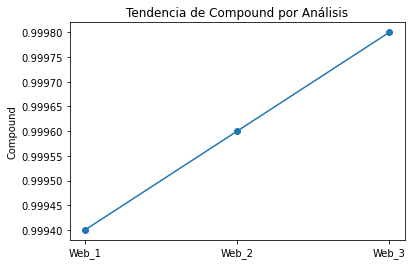

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df['Análisis'], df['Compound'], marker='o')

ax.set_ylabel('Compound')
ax.set_title('Tendencia de Compound por Análisis')

plt.show()


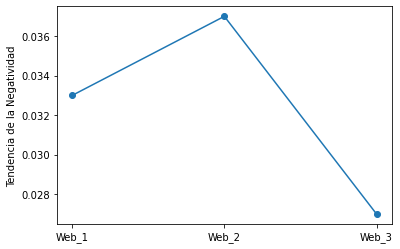

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df['Análisis'], df['Negatividad'], marker='o')

ax.set_ylabel('Tendencia de la Negatividad')

plt.show()

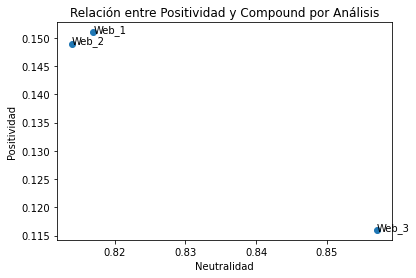

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(df['Neutralidad'], df['Positividad'])
for i, txt in enumerate(df['Análisis']):
    ax.annotate(txt, (df['Neutralidad'][i], df['Positividad'][i]))

ax.set_xlabel('Neutralidad')
ax.set_ylabel('Positividad')
ax.set_title('Relación entre Positividad y Compound por Análisis')

plt.show()


# WordCloud

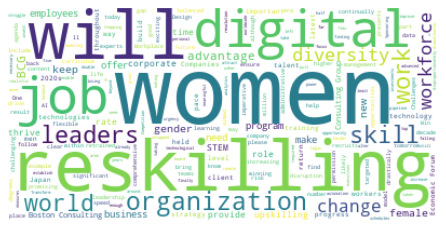

In [34]:
wordcloud_1 = WordCloud(background_color='white').generate(full_text_1)

plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#wordcloud.to_file('wordcloud_2.png')